visualizing the relationship between age and bmi and coloring points on diabetic standing 

In [1]:
# importing libraries
library(tidyverse)
library(repr)
library(janitor)
library(ggplot2)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ──────

In [2]:
# Cleaning names and specifying categorical variable
diabetes <- read_csv("../data/diabetes.csv") |>
            clean_names() |>
            mutate(outcome = as_factor(outcome)) |>
            mutate(diabetes = fct_recode(outcome, "Yes" = "1", "No" = "0")) |>
            select(-outcome)

# Displaying the data
head(diabetes)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,148,72,35,0,33.6,0.627,50,Yes
1,85,66,29,0,26.6,0.351,31,No
8,183,64,0,0,23.3,0.672,32,Yes
1,89,66,23,94,28.1,0.167,21,No
0,137,40,35,168,43.1,2.288,33,Yes
5,116,74,0,0,25.6,0.201,30,No


In [3]:
# splitting the diatabes data
diabetes_split <- initial_split(diabetes, prop = 0.75, strata = diabetes)

# training data
diabetes_training <- training(diabetes_split)

# testing data
diabetes_testing <- testing(diabetes_split)

# the data to be used
head(diabetes_training)

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,No
5,116,74,0,0,25.6,0.201,30,No
10,115,0,0,0,35.3,0.134,29,No
4,110,92,0,0,37.6,0.191,30,No
10,139,80,0,0,27.1,1.441,57,No
1,103,30,38,83,43.3,0.183,33,No


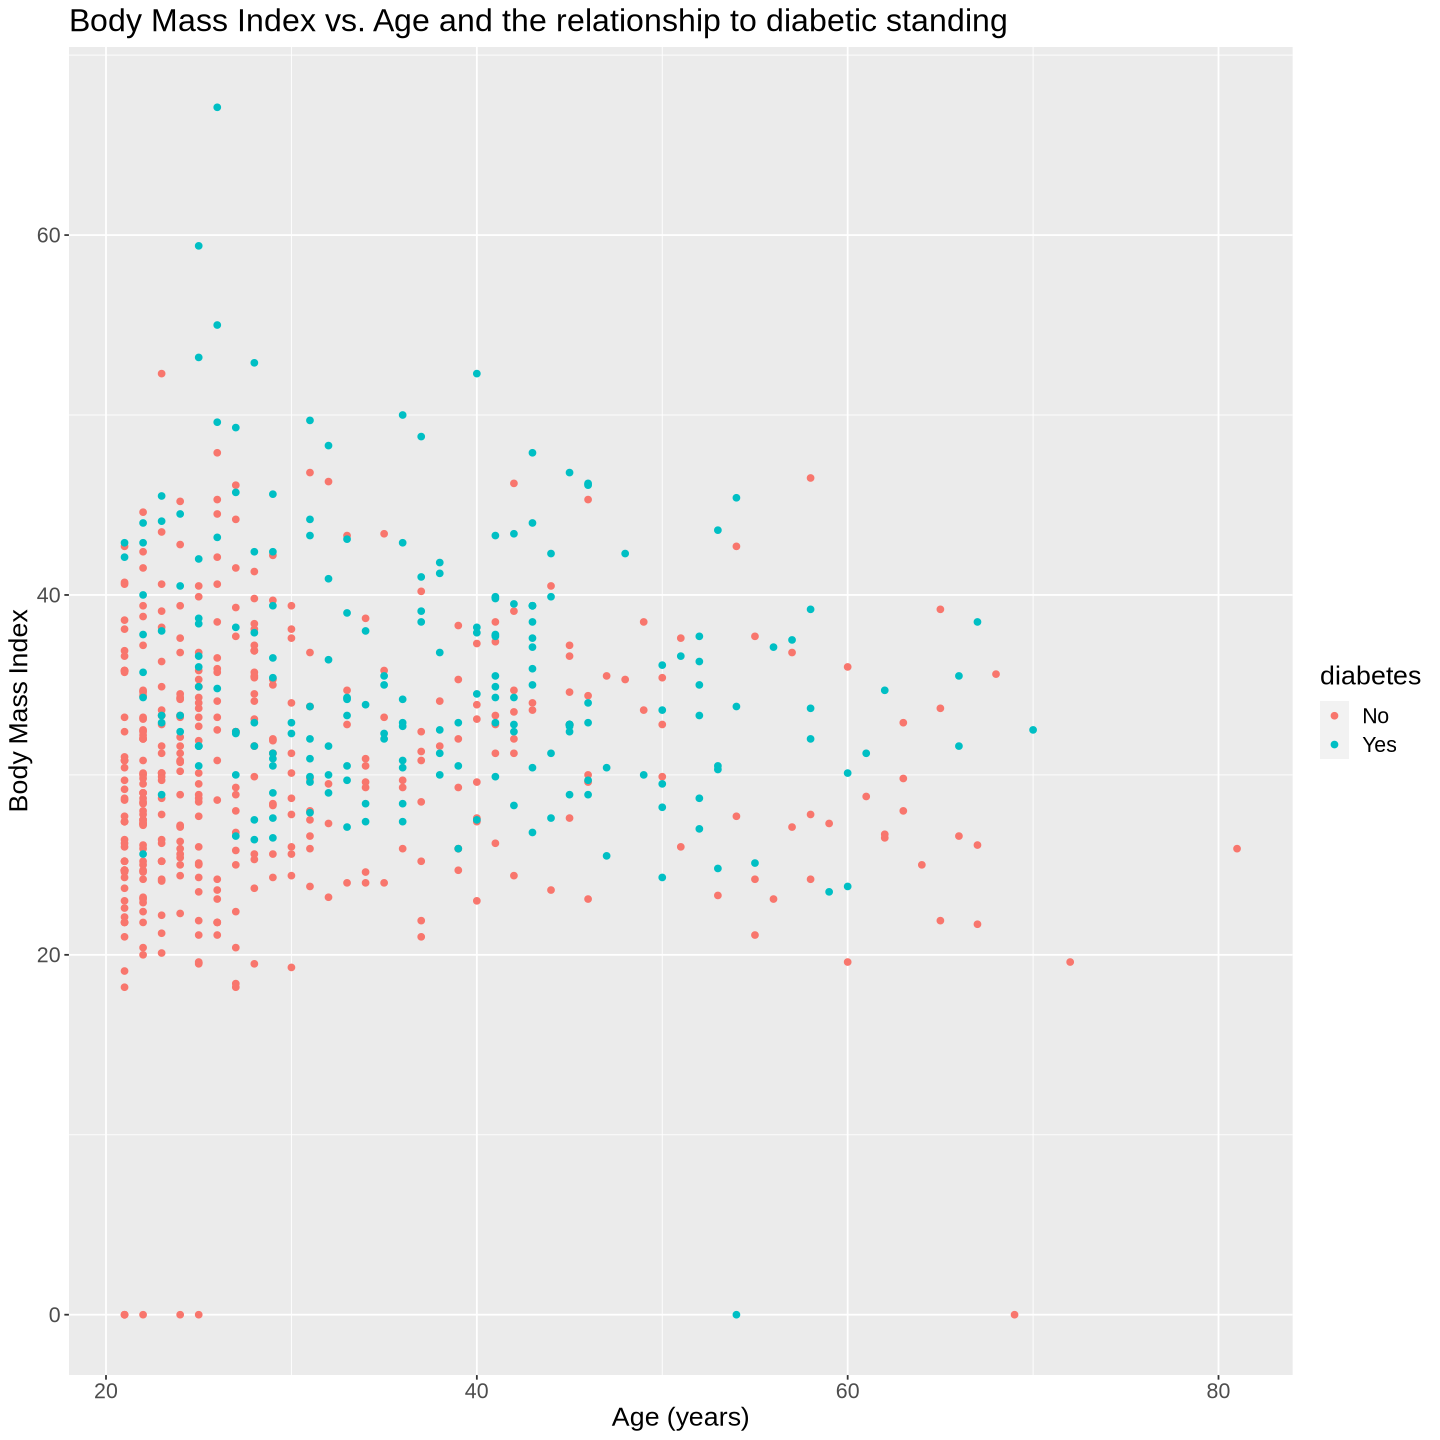

In [4]:
options(repr.plot.height = 12, repr.plot.width = 12)
#diabetes_training_clean <- diabetes_training |> 
#    filter(bmi != 0)
age_scatter <- diabetes_training |> 
    ggplot(aes(x = age, y = bmi)) + 
    geom_point(aes(color = diabetes)) + 
    labs(x = "Age (years)", y = "Body Mass Index",
             title = "Body Mass Index vs. Age and the relationship to diabetic standing") +
    theme(text = element_text(size = 16))
age_scatter

Find how much insulin people with diabetes used compared to their bmi

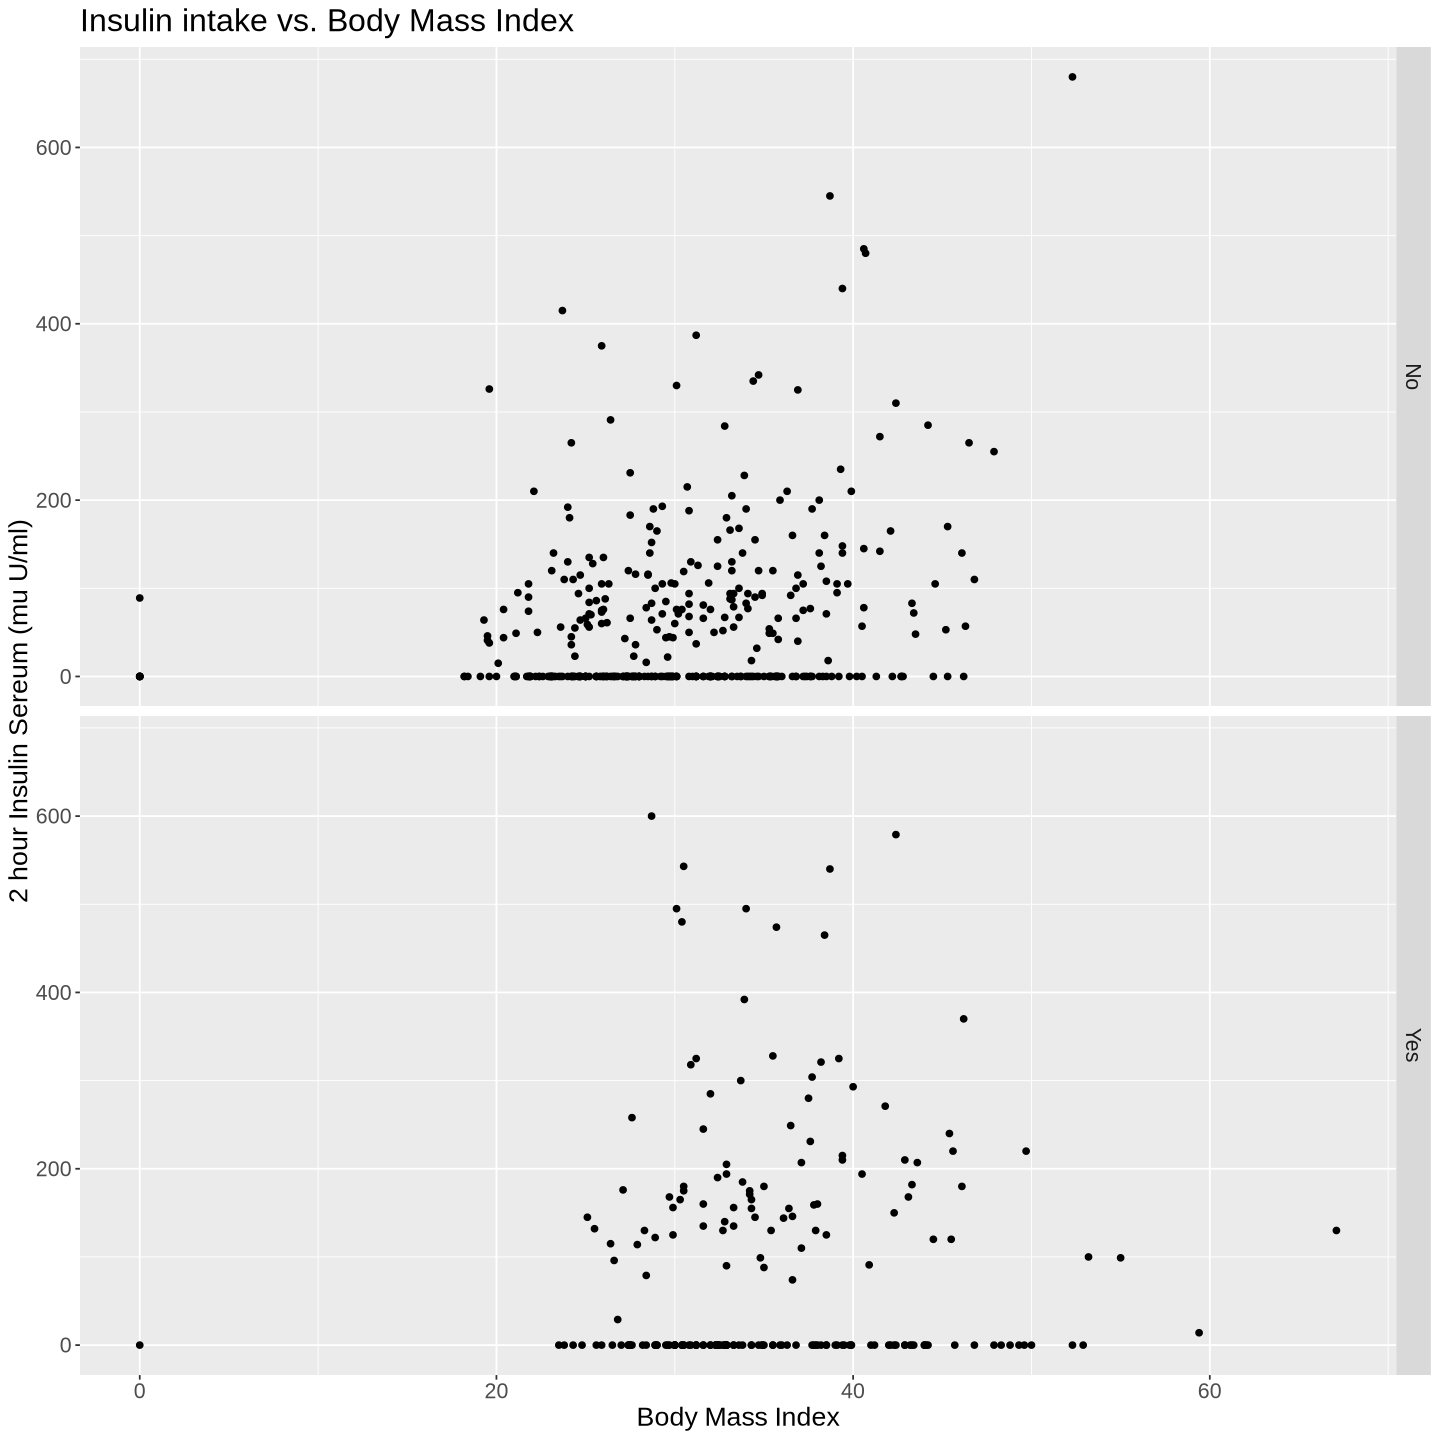

In [5]:
#diabetic <- diabetes_training |> 
#    filter(diabetes == "Yes")

options(repr.plot.height = 12, repr.plot.width = 12)
insulin_scatter <- diabetes_training |> 
    ggplot(aes(x = bmi, y = insulin)) + 
    geom_point() + 
    labs(x = "Body Mass Index", y = "2 hour Insulin Sereum (mu U/ml)",
             title = "Insulin intake vs. Body Mass Index") + 
    theme(text = element_text(size = 16)) + 
    facet_grid(rows = vars(diabetes))
insulin_scatter
    

blood pressure vs age

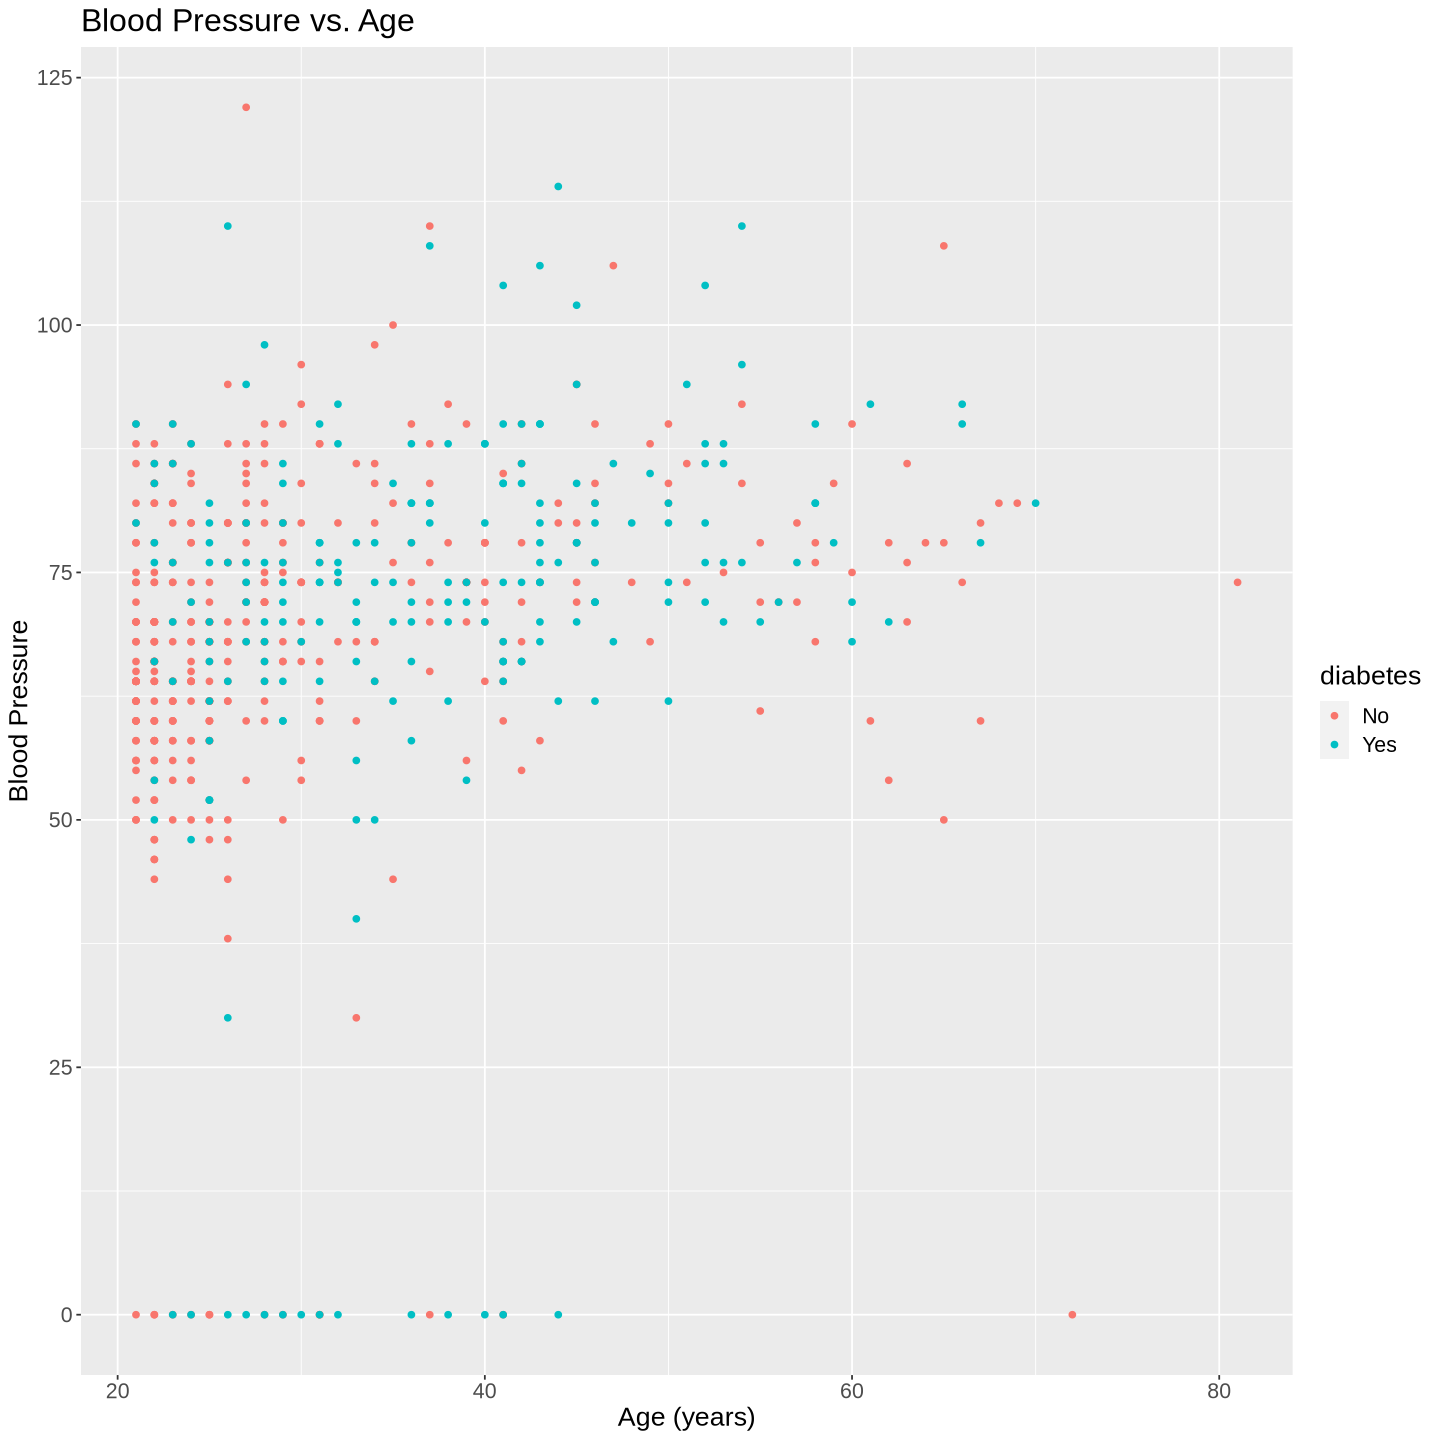

In [6]:
options(repr.plot.height = 12, repr.plot.width = 12)
blood_pressure_scatter <- diabetes_training |> 
    ggplot(aes(x = age, y = blood_pressure)) + 
    geom_point(aes(color = diabetes)) + 
    labs(x = "Age (years)", y = "Blood Pressure",
             title = "Blood Pressure vs. Age") + 
    theme(text = element_text(size = 16)) #+ 
 #   facet_grid(rows = vars(diabetes)) 
blood_pressure_scatter

Not alot of visible signficance here but could be useful to have

Does amount of pregnancies impact if a person has diabetes or not

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,No
5,116,74,0,0,25.6,0.201,30,No
10,115,0,0,0,35.3,0.134,29,No
4,110,92,0,0,37.6,0.191,30,No
10,139,80,0,0,27.1,1.441,57,No
1,103,30,38,83,43.3,0.183,33,No


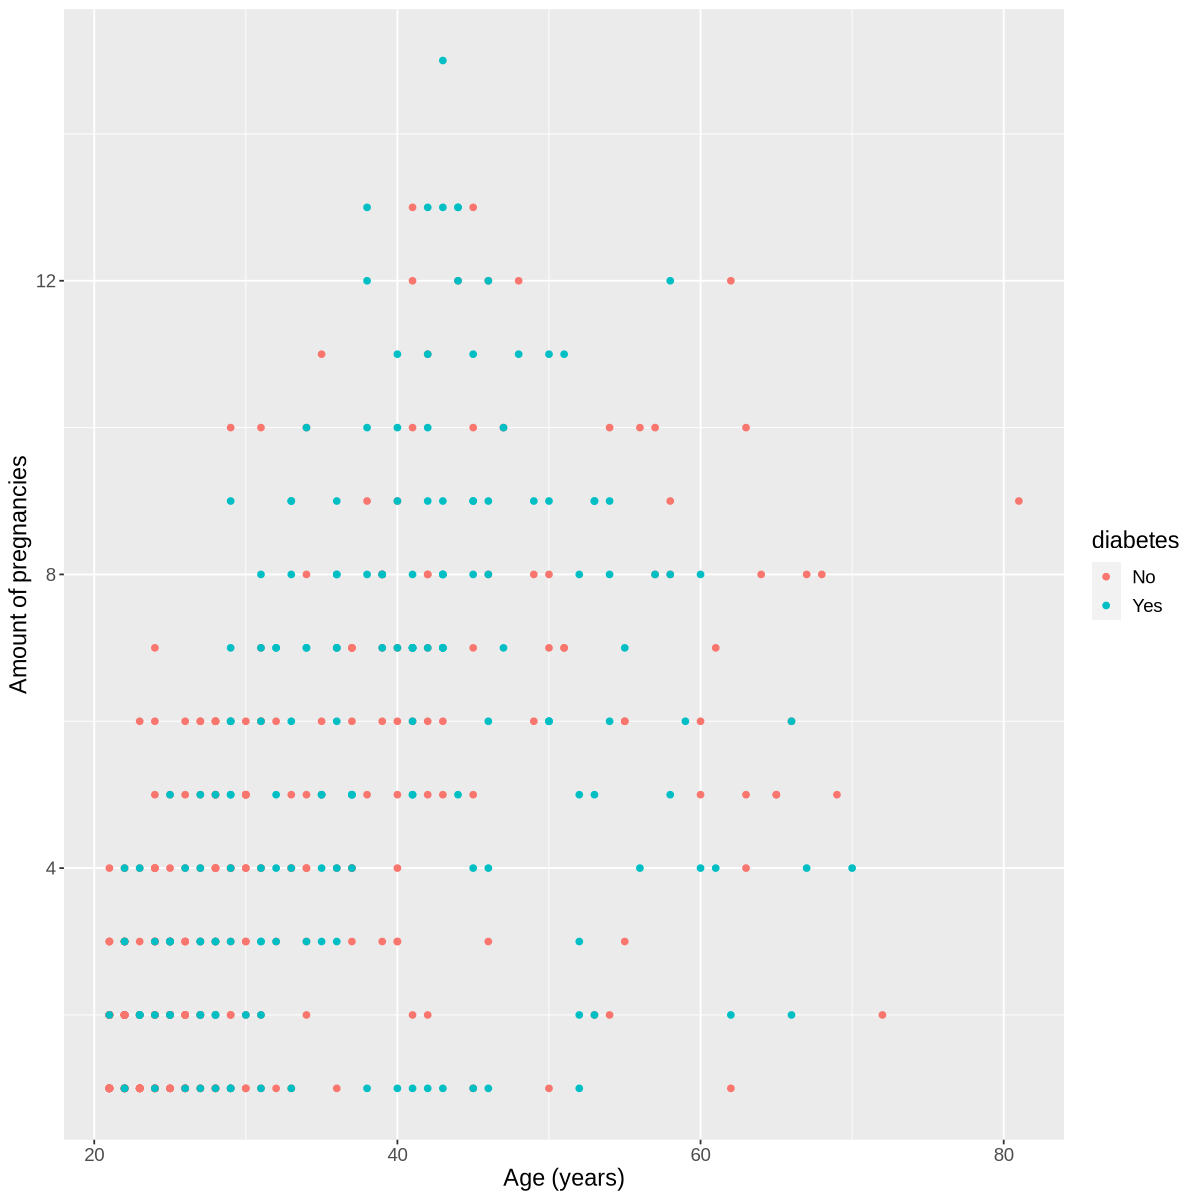

In [7]:
mothers <- filter(diabetes_training, pregnancies > 0) 
head(mothers)
                              

options(repr.plot.height = 10, repr.plot.width = 10)
mothers_plot <- mothers |> 
    ggplot(aes(x = age, y = pregnancies)) + 
    geom_point(aes(color = diabetes)) + 
    labs(x = "Age (years)", y = "Amount of pregnancies") + 
    theme(text = element_text(size = 14))
mothers_plot

Group by age and average the amount of pregnancies - then make a faceted bar plot for diabetics and non diabetics 

`summarise()` has grouped output by 'age', 'diabetes'. You can override using
the `.groups` argument.
Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


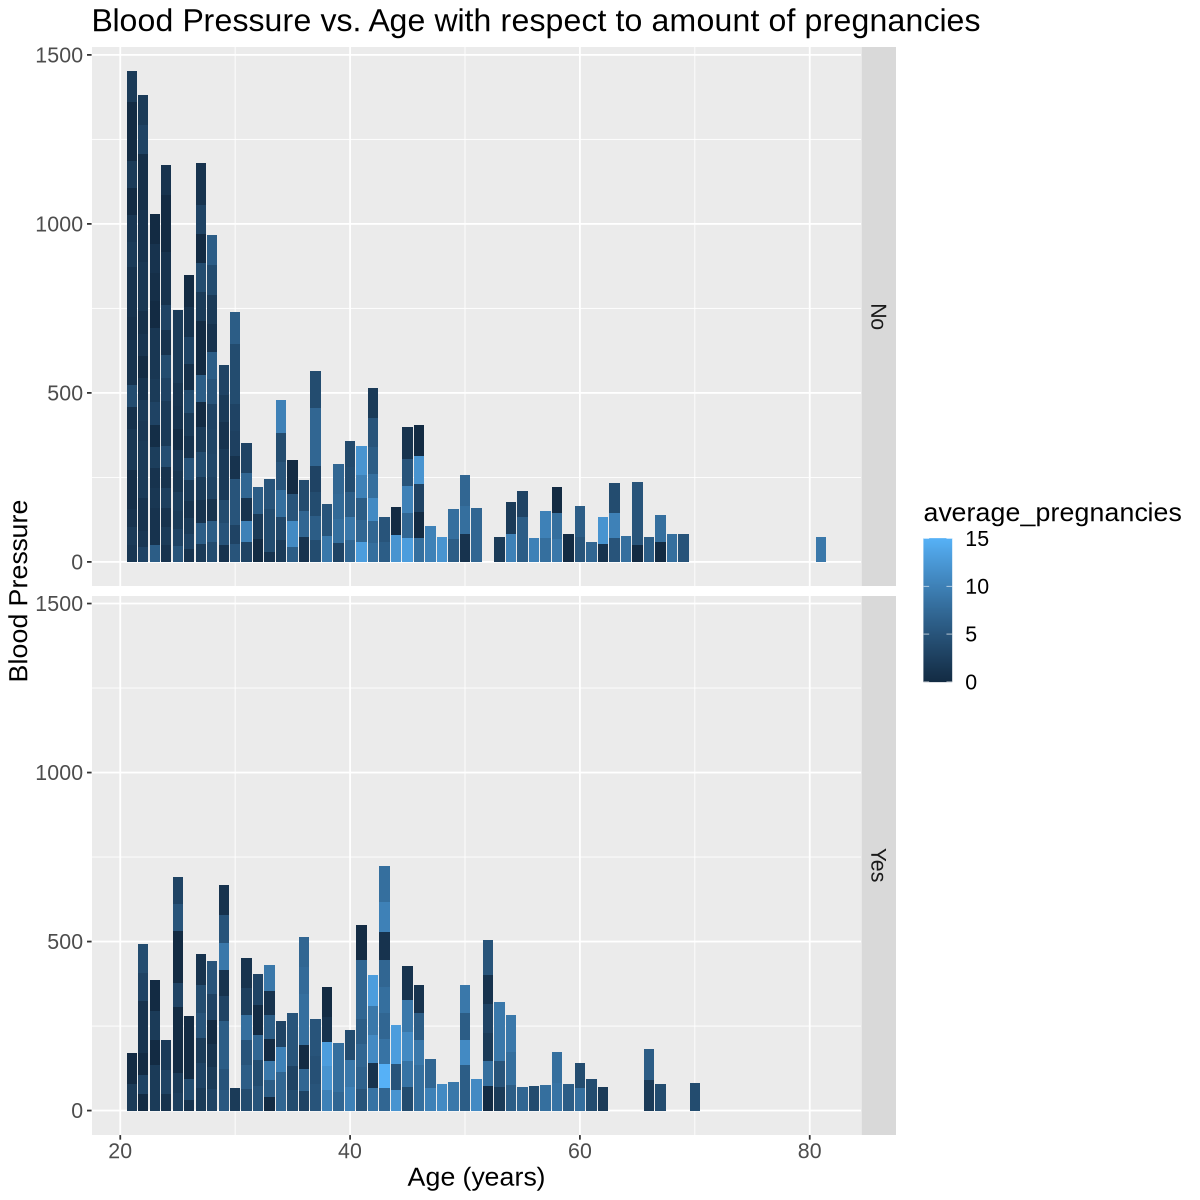

In [19]:
average_pregnancies <- diabetes_training |> 
    group_by(age, diabetes, blood_pressure) |> 
    summarize(average_pregnancies = mean(pregnancies))

pregnant_diabetes <- average_pregnancies |> 
   ggplot(aes(x = age, y = blood_pressure, fill = average_pregnancies)) + 
    geom_histogram(stat = "identity") + 
    labs(x = "Age (years)", y = "Blood Pressure", 
         title = "Blood Pressure vs. Age with respect to amount of pregnancies") +
    facet_grid(rows = vars(diabetes)) + 
    theme(text = element_text(size = 16))
pregnant_diabetes 

How does blood pressure and bmi/age relate to diabetic diagnosis

pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,diabetes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,85,66,29,0,26.6,0.351,31,No
5,116,74,0,0,25.6,0.201,30,No
10,115,0,0,0,35.3,0.134,29,No
4,110,92,0,0,37.6,0.191,30,No
10,139,80,0,0,27.1,1.441,57,No
1,103,30,38,83,43.3,0.183,33,No


`summarise()` has grouped output by 'bmi', 'blood_pressure', 'diabetes'. You
can override using the `.groups` argument.


bmi,blood_pressure,diabetes,skin_thickness,average_skin_thickness
<dbl>,<dbl>,<fct>,<dbl>,<dbl>
0.0,0,No,0,0
0.0,64,No,23,23
0.0,82,No,0,0
0.0,96,Yes,0,0
18.2,68,No,0,0
18.2,70,No,15,15


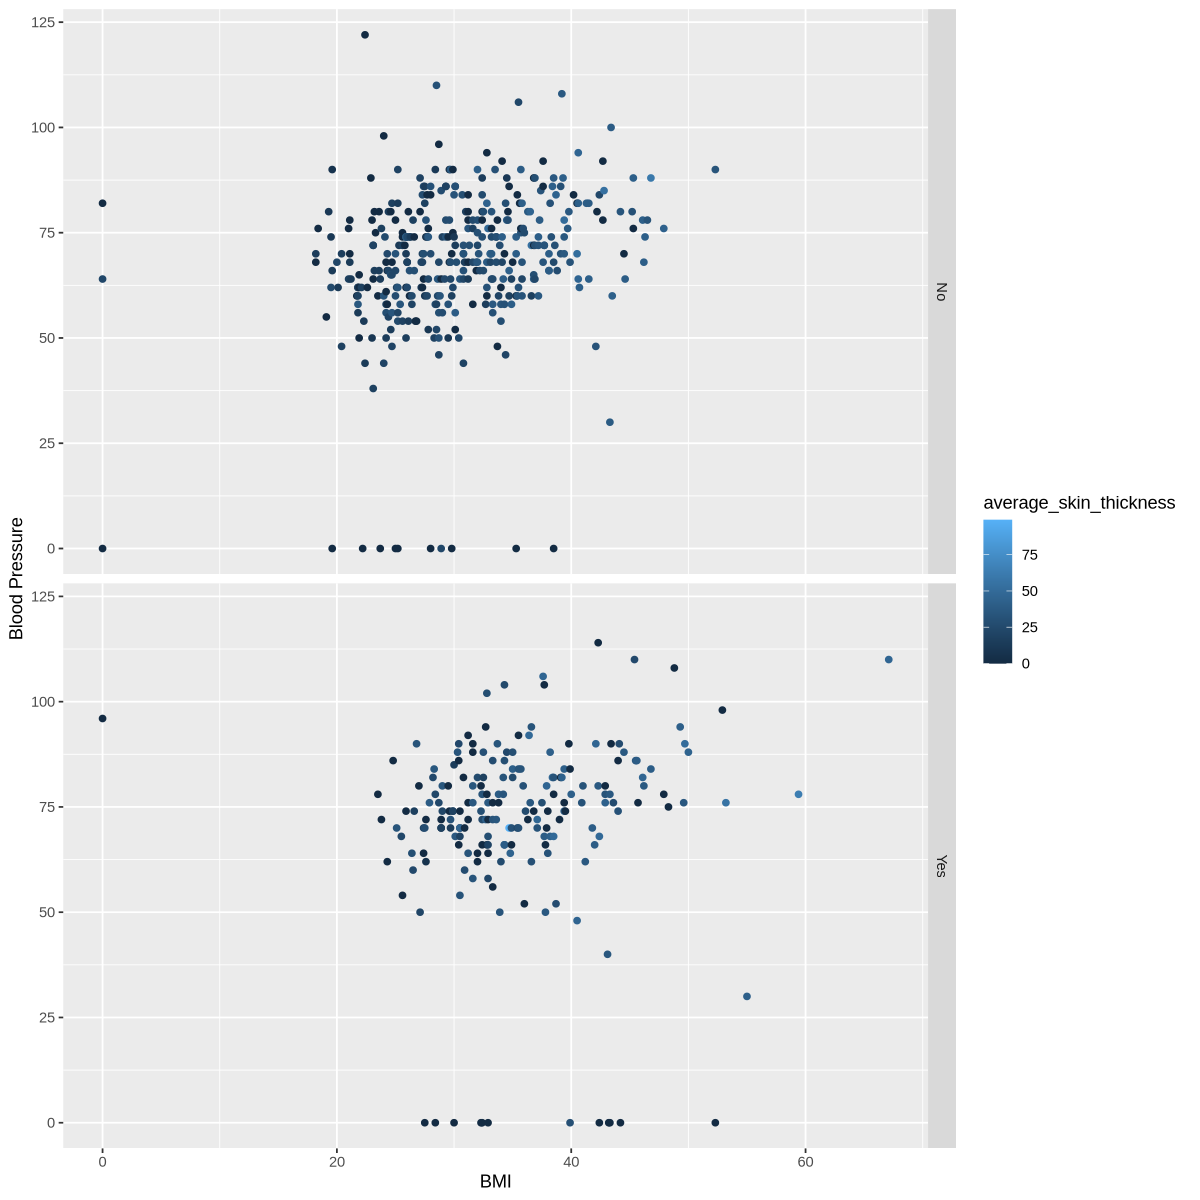

In [35]:
head(diabetes_training)

blood_pressure_summary <- diabetes_training |> 
    group_by(bmi, blood_pressure, diabetes, skin_thickness) |> 
    summarize(average_skin_thickness = mean(skin_thickness))
head(blood_pressure_summary)
    

blood_pressure_plot <- blood_pressure_summary |> 
    ggplot(aes(x = bmi, y = blood_pressure)) + 
    geom_point(aes(color = average_skin_thickness)) + 
    labs(x = "BMI", y = "Blood Pressure") + 
    facet_grid(rows = vars(diabetes))
blood_pressure_plot

